In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization,Concatenate
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
label_train = []
label_test = []
def reading_train(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes') 
    train = dict[b'data']
    train = train.reshape((len(train), 3, 32, 32)).transpose(0, 2, 3, 1)
    for i in dict[b'labels']:
        label_train.append(i)
    return train

def reading_test(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes') 
    train = dict[b'data']
    train = train.reshape((len(train), 3, 32, 32)).transpose(0, 2, 3, 1)   
    for i in dict[b'labels']:
        label_test.append(i)
    return train

df1 = reading_train('data_batch_1')
df2 = reading_train('data_batch_2')
df3 = reading_train('data_batch_3')
df4 = reading_train('data_batch_4')
df5 = reading_train('data_batch_5')
ataboi = np.concatenate((df1,df2,df3,df4,df5))
dftest = reading_test('test_batch') 
ataboi.shape
len(label_train)

50000

In [3]:
augmented = []
i = 0
for item in ataboi:
    flip_1 = np.fliplr(item)
    flip_2 = np.flipud(item)
    augmented.append(flip_1)
    augmented.append(flip_2)
    label_train.append(label_train[i])
    label_train.append(label_train[i])
    i = i+1
len(label_train)

150000

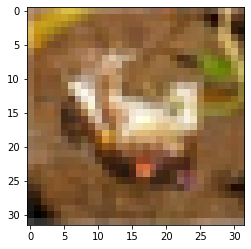

In [4]:
plt.imshow(augmented[1])

In [5]:
arr = np.array(augmented)

In [6]:
arr.shape

(100000, 32, 32, 3)

In [7]:
ataboi = np.concatenate((ataboi,arr))
len(ataboi)

150000

In [8]:
dftest.shape

(10000, 32, 32, 3)

In [9]:
ataboi,dftest = ataboi / 255.0, dftest / 255.0

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)       

In [22]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
history = model.fit(ataboi,label_train,epochs=50,batch_size=64,validation_split=0.1)

Train on 135000 samples, validate on 15000 samples
Epoch 1/50
135000/135000 [==============================] - 100s 742us/step - loss: 1.4527 - accuracy: 0.4832 - val_loss: 1.0242 - val_accuracy: 0.6304
Epoch 2/50
135000/135000 [==============================] - 96s 708us/step - loss: 0.9862 - accuracy: 0.6501 - val_loss: 0.8507 - val_accuracy: 0.6923
Epoch 3/50
135000/135000 [==============================] - 94s 699us/step - loss: 0.8362 - accuracy: 0.7073 - val_loss: 0.7868 - val_accuracy: 0.7254
Epoch 4/50
135000/135000 [==============================] - 96s 709us/step - loss: 0.7419 - accuracy: 0.7410 - val_loss: 0.6362 - val_accuracy: 0.7717
Epoch 5/50
135000/135000 [==============================] - 95s 704us/step - loss: 0.6778 - accuracy: 0.7648 - val_loss: 0.5985 - val_accuracy: 0.7905
Epoch 6/50
135000/135000 [==============================] - 96s 708us/step - loss: 0.6318 - accuracy: 0.7811 - val_loss: 0.5838 - val_accuracy: 0.7933
Epoch 7/50
135000/135000 [================

In [25]:
scores = model.evaluate(dftest, label_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 372us/step
Test loss: 0.3606984977245331
Test accuracy: 0.8820000290870667
